# Usando Random Forest

## Librerias a usar

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

## Modelo de regresión

In [3]:
train_data=pd.read_csv("../../train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath"]
_train2 = train_data[columnas_aUsar]

y = train_data["SalePrice"]
X = _train2

print("Columnas usadas (" + str(len(_train2.columns)) + ") :\n"+ str(_train2.columns))

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Escalar datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train.describe()

Columnas usadas (9) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath'],
      dtype='object')
(1021, 9)
(438, 9)
(1021,)
(438,)


count      1021.000000
mean     182499.498531
std       81024.933938
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [4]:
# Crear y entrenar el modelo
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=7)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

#### Evaluación

In [5]:
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

R^2: 0.8721
MAE: 18540.9392
MSE: 730526406.6278


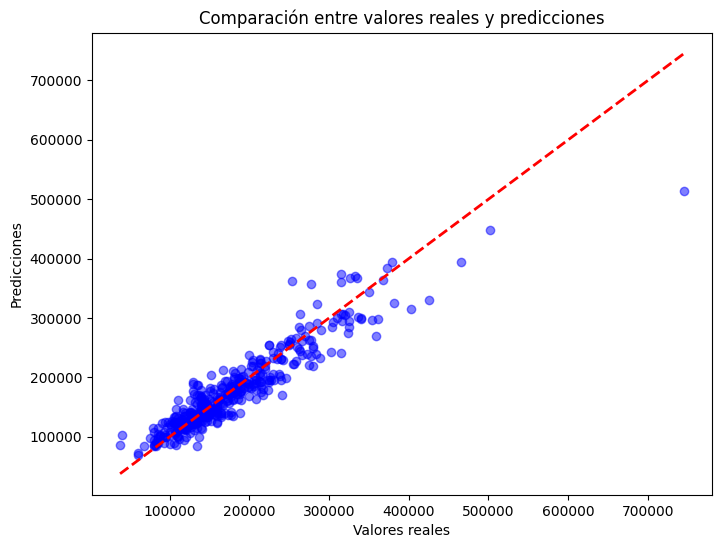

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

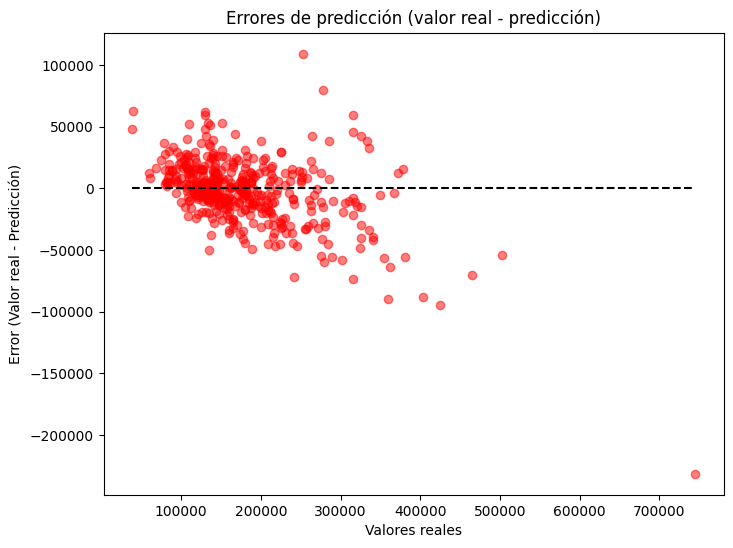

In [7]:
errores = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

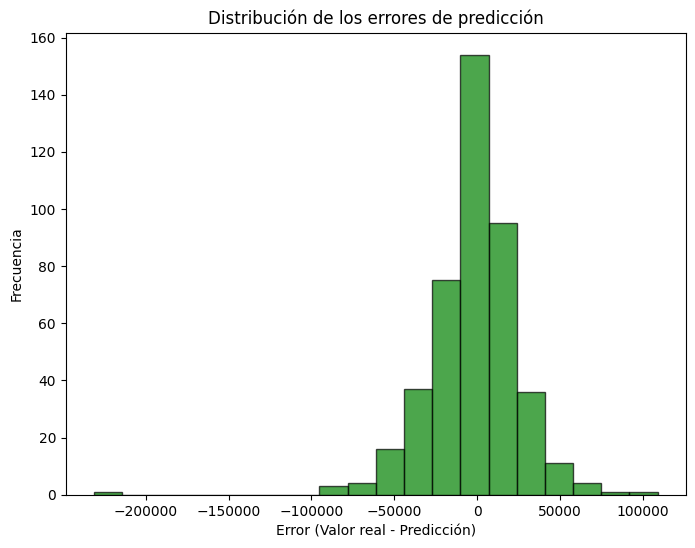

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

## Modelo de clasificación

In [4]:
# Cargar los datos
df = pd.read_csv('../../train.csv')

# Calcular los tercilos (dividir los datos en tres partes iguales)
tercil_1 = np.percentile(df['SalePrice'], 33.33)
tercil_2 = np.percentile(df['SalePrice'], 66.67)

print(f"Tercil 1 (33.33%): ${int(tercil_1):,}")
print(f"Tercil 2 (66.67%): ${int(tercil_2):,}")

# 1. Crear la variable de clasificación
df['PriceCategory'] = pd.cut(
    df['SalePrice'],
    bins=[0, tercil_1, tercil_2, float('inf')],
    labels=['Económico', 'Medio', 'Premium'],
    include_lowest=True
)

# Verificar la distribución de las categorías
category_counts = df['PriceCategory'].value_counts().sort_index()
print("\nDistribución de categorías:")
print(category_counts)
print(f"Porcentajes: {category_counts / len(df) * 100}")

Tercil 1 (33.33%): $139,685
Tercil 2 (66.67%): $190,000

Distribución de categorías:
PriceCategory
Económico    487
Medio        490
Premium      483
Name: count, dtype: int64
Porcentajes: PriceCategory
Económico    33.356164
Medio        33.561644
Premium      33.082192
Name: count, dtype: float64


In [5]:
# 2. Seleccionar las características para el modelo
# Basado en nuestro análisis previo, seleccionamos las características más importantes
selected_features = [
    'OverallQual',    # Calidad general
    'GrLivArea',      # Área habitable
    'GarageCars',     # Capacidad del garaje
    'YearBuilt',      # Año de construcción
    'TotalBsmtSF',    # Superficie total del sótano
    'FullBath',       # Baños completos
    'Neighborhood',   # Vecindario (categórica)
    'ExterQual',      # Calidad del exterior (categórica)
    'KitchenQual',    # Calidad de la cocina (categórica)
    'BsmtQual'        # Calidad del sótano (categórica)
]

# 3. Preparar las características para el modelo
X = df[selected_features].copy()
y = df['PriceCategory']

# Manejar valores faltantes en características numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
X[numeric_features] = imputer.fit_transform(X[numeric_features])

# Manejar valores faltantes en características categóricas
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features] = X[categorical_features].fillna('None')

# Codificar variables categóricas
encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    encoders[feature] = le


# 4. Crear y entrenar el modelo Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=1000,        # Número de árboles en el bosque
    max_depth=7,             # Profundidad máxima de los árboles
    min_samples_split=20,    # Mínimo de muestras para dividir un nodo
    min_samples_leaf=10,     # Mínimo de muestras en un nodo hoja
    random_state=42,
    n_jobs=-1                # Usar todos los núcleos disponibles para mayor rendimiento
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf_classifier.fit(X_train, y_train)

# 5. Evaluar el modelo
y_pred = rf_classifier.predict(X_test)

# ------- ANÁLISIS DE EFICIENCIA DEL MODELO -------
# Para modelos de clasificación, adaptamos las métricas de regresión
# Convertir categorías a valores numéricos para calcular R2, MAE, MSE
label_map = {'Económico': 0, 'Medio': 1, 'Premium': 2}
y_test_numeric = y_test.map(label_map)
y_pred_numeric = np.array([label_map[pred] for pred in y_pred])

conf_matrix = confusion_matrix(y_test, y_pred)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular R2, MAE y MSE
r2 = r2_score(y_test_numeric, y_pred_numeric)
mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
mse = mean_squared_error(y_test_numeric, y_pred_numeric)
rmse = np.sqrt(mse)

accuracy = accuracy_score(y_test, y_pred)
# Crear un dataframe con un resumen de las métricas
metrics_summary = pd.DataFrame({
    'Métrica': ['Accuracy', 'R²', 'MAE', 'MSE', 'RMSE'],
    'Valor': [accuracy, r2, mae, mse, rmse]
})

print("\n--- RESUMEN DE MÉTRICAS DE EFICIENCIA ---")
print(metrics_summary)



Reporte de clasificación:
              precision    recall  f1-score   support

   Económico       0.83      0.82      0.82       146
       Medio       0.70      0.73      0.72       147
     Premium       0.89      0.86      0.87       145

    accuracy                           0.80       438
   macro avg       0.80      0.80      0.80       438
weighted avg       0.80      0.80      0.80       438


--- RESUMEN DE MÉTRICAS DE EFICIENCIA ---
    Métrica     Valor
0  Accuracy  0.801370
1        R²  0.690719
2       MAE  0.200913
3       MSE  0.205479
4      RMSE  0.453298


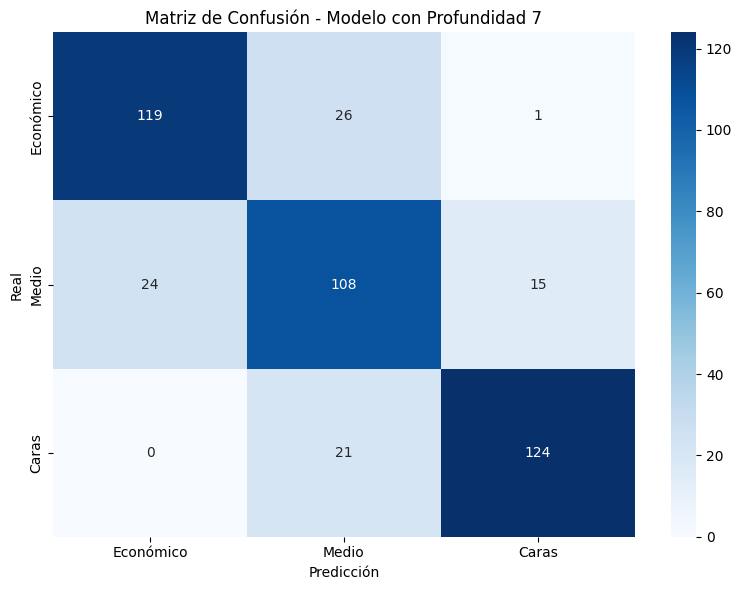

In [11]:
# Mostrar la matriz de confusión del mejor modelo
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=['Económico', 'Medio', 'Caras'],
    yticklabels=['Económico', 'Medio', 'Caras']
)
plt.title(f'Matriz de Confusión - Modelo con Profundidad 7')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

## Envío de datos

In [6]:
import pickle

data = [X_test, X_train, y_test, y_train]

# Guardar variables en un archivo
with open("../Entrega_3/variablesRF.pkl", "wb") as f:
    pickle.dump({"data": data, "model": rf_classifier}, f)